In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import coo_matrix
from sklearn.feature_extraction.text import CountVectorizer
import re


In [2]:
df_indeed_list = pd.read_csv("data/indeed_data_scientist_list.csv")
df_linkedin_list = pd.read_csv("data/linkedin_data_scientist_list.csv")
df_list = pd.concat([df_indeed_list, df_linkedin_list], axis=0)
df_list.drop_duplicates(subset=["title", "company", "text"], keep="first", inplace=True)
df_list.dropna(subset=["text"], inplace=True)
df_list.reset_index(inplace=True, drop=True)

In [3]:
#Fetch wordcount for each abstract
df_list['word_count'] = df_list["text"].apply(lambda x: len(str(x).split(" ")))

In [4]:
#Identify common words
freq = pd.Series(' '.join(df_list["text"]).split()).value_counts()[:20]

In [5]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(df_list["text"]).split()).value_counts()[-20:]

In [6]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [7]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [8]:
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "owner", "two", "new", "previously", "cambridge", "shown", "work", "technology", "de", "business", "product", "et", "asset", "required", "engineer", "opportunity", "within", "including", "tool", "create", "etc"]
stop_words = stop_words.union(new_words)

In [9]:
corpus = []
for i in range(len(df_list["text"])):
    #Remove punctuations
    text = re.sub(r'[^a-zA-Z]', ' ', df_list["text"][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub(r"&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub(r"(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [10]:
# wordcloud = WordCloud(
#                           background_color='white',
#                           stopwords=stop_words,
#                           max_words=100,
#                           max_font_size=50,
#                         scale = 15,
#                           random_state=42
#                          ).generate(str(corpus))

# print(wordcloud)
# fig = plt.figure(1)
# plt.imshow(wordcloud)
# plt.axis('off')
# # plt.figure(figsize=(10,10))
# plt.show()
# fig.savefig("word1.png", dpi=900)

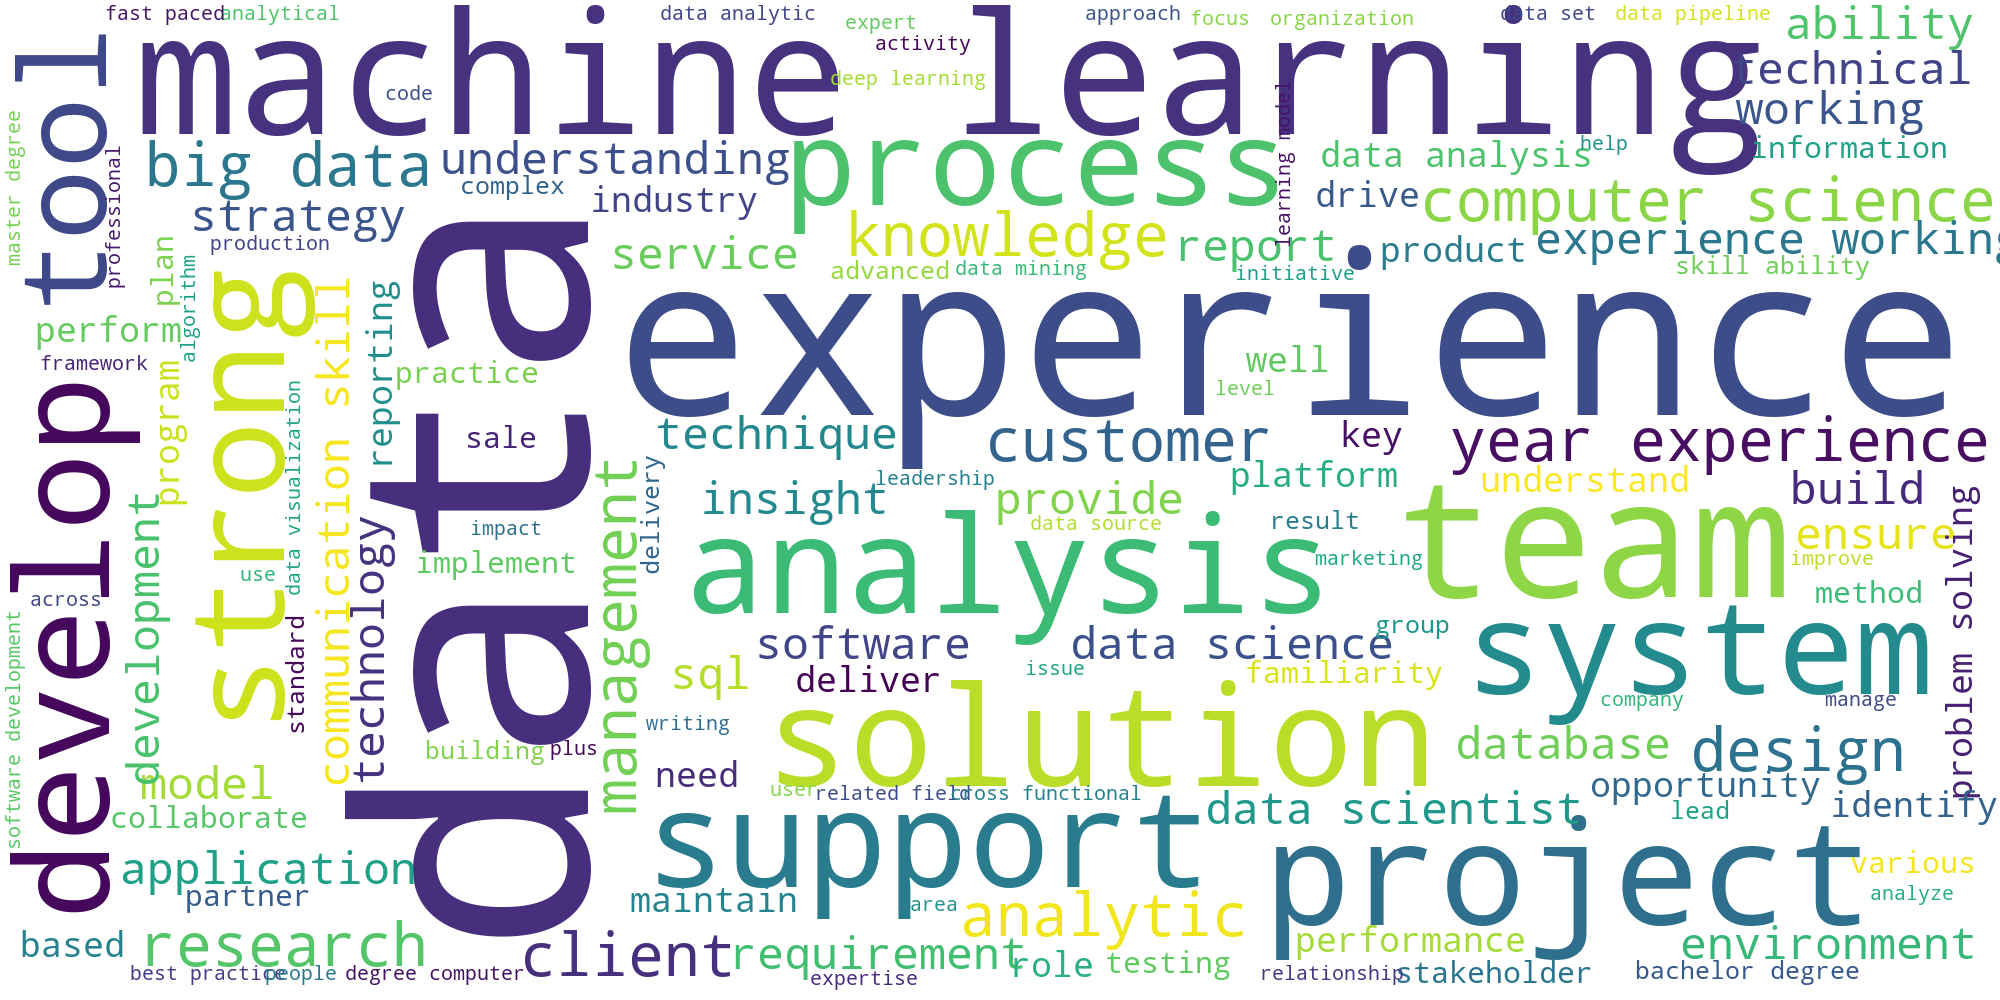

In [11]:
long_string = ','.join(corpus)# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, scale=5, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
# plt.figure(figsize=(15,15))
wordcloud.to_image()

In [12]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [13]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n] #Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'data'),
 Text(0, 0, 'experience'),
 Text(0, 0, 'team'),
 Text(0, 0, 'skill'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'model'),
 Text(0, 0, 'development'),
 Text(0, 0, 'ability'),
 Text(0, 0, 'year'),
 Text(0, 0, 'analysis'),
 Text(0, 0, 'management'),
 Text(0, 0, 'working'),
 Text(0, 0, 'machine'),
 Text(0, 0, 'science'),
 Text(0, 0, 'strong'),
 Text(0, 0, 'project'),
 Text(0, 0, 'knowledge'),
 Text(0, 0, 'design'),
 Text(0, 0, 'technical'),
 Text(0, 0, 'solution')]

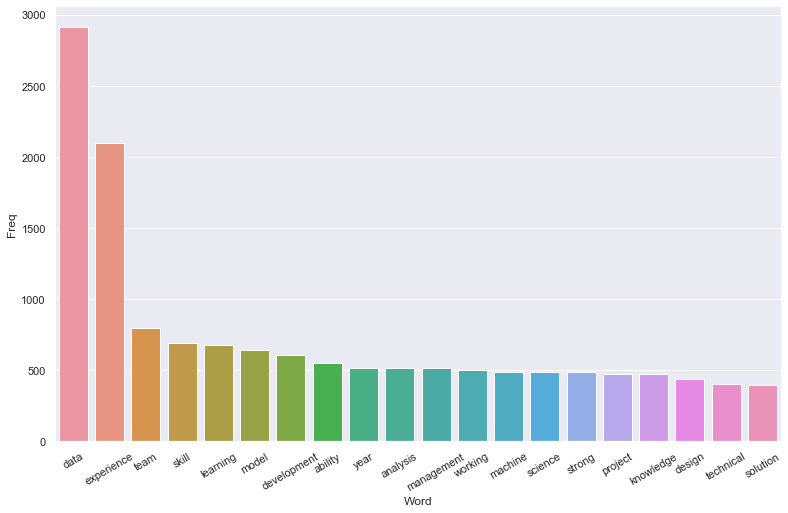

In [14]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0       machine learning   474
1       computer science   232
2               big data   209
3        year experience   205
4     experience working   181
5           data science   174
6    communication skill   163
7         data scientist   157
8          data analysis   116
9        problem solving   109
10       experience data   102
11       bachelor degree    87
12         skill ability    84
13        data analytics    79
14           data mining    78
15         best practice    78
16       degree computer    77
17              data set    75
18         deep learning    74
19  software development    72


[Text(0, 0, 'machine learning'),
 Text(0, 0, 'computer science'),
 Text(0, 0, 'big data'),
 Text(0, 0, 'year experience'),
 Text(0, 0, 'experience working'),
 Text(0, 0, 'data science'),
 Text(0, 0, 'communication skill'),
 Text(0, 0, 'data scientist'),
 Text(0, 0, 'data analysis'),
 Text(0, 0, 'problem solving'),
 Text(0, 0, 'experience data'),
 Text(0, 0, 'bachelor degree'),
 Text(0, 0, 'skill ability'),
 Text(0, 0, 'data analytics'),
 Text(0, 0, 'data mining'),
 Text(0, 0, 'best practice'),
 Text(0, 0, 'degree computer'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'deep learning'),
 Text(0, 0, 'software development')]

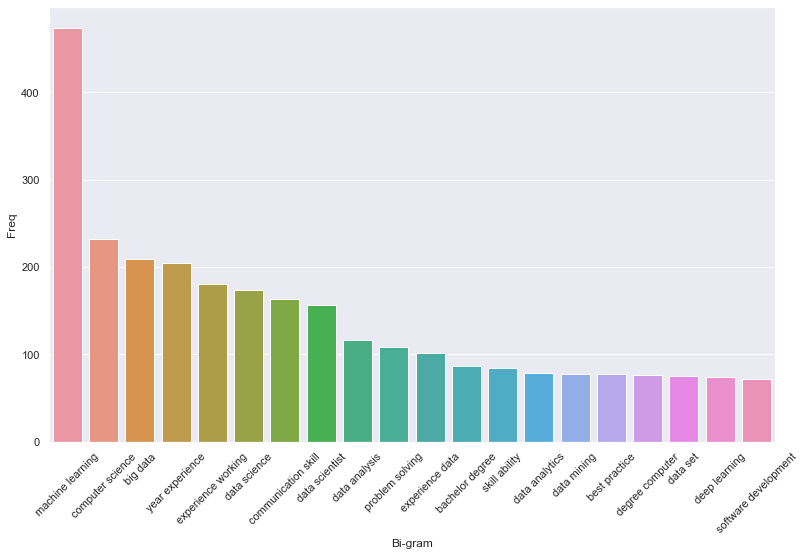

In [15]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                        Tri-gram  Freq
0        degree computer science    70
1         machine learning model    68
2   computer science engineering    47
3          problem solving skill    47
4    written communication skill    44
5          cross functional team    44
6    natural language processing    41
7   engineering computer science    38
8            experience big data    38
9            big data technology    37
10  verbal written communication    35
11      computer science related    35
12    machine learning technique    33
13        fast paced environment    32
14  written verbal communication    31
15   communication skill ability    31
16    machine learning algorithm    29
17    analytical problem solving    29
18    verbal communication skill    29
19       minimum year experience    29


[Text(0, 0, 'degree computer science'),
 Text(0, 0, 'machine learning model'),
 Text(0, 0, 'computer science engineering'),
 Text(0, 0, 'problem solving skill'),
 Text(0, 0, 'written communication skill'),
 Text(0, 0, 'cross functional team'),
 Text(0, 0, 'natural language processing'),
 Text(0, 0, 'engineering computer science'),
 Text(0, 0, 'experience big data'),
 Text(0, 0, 'big data technology'),
 Text(0, 0, 'verbal written communication'),
 Text(0, 0, 'computer science related'),
 Text(0, 0, 'machine learning technique'),
 Text(0, 0, 'fast paced environment'),
 Text(0, 0, 'written verbal communication'),
 Text(0, 0, 'communication skill ability'),
 Text(0, 0, 'machine learning algorithm'),
 Text(0, 0, 'analytical problem solving'),
 Text(0, 0, 'verbal communication skill'),
 Text(0, 0, 'minimum year experience')]

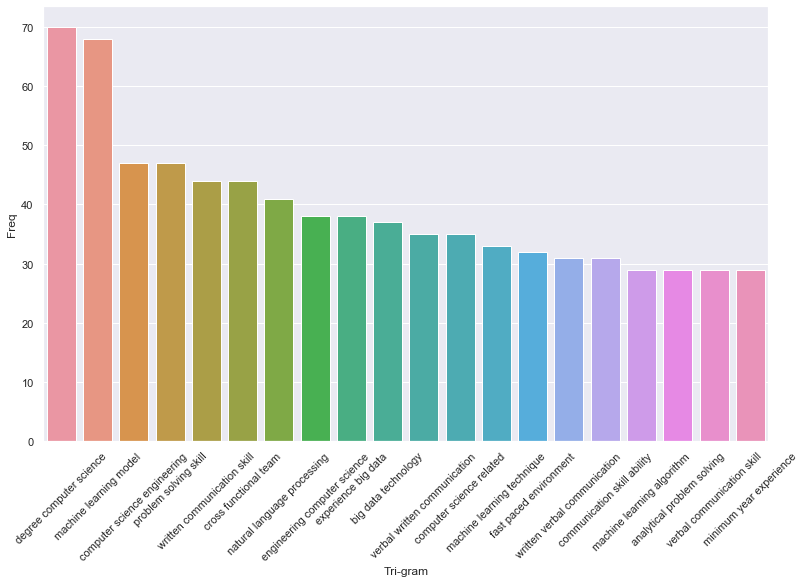

In [16]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

print(top3_df)#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [17]:
#Function for sorting tf_idf in descending order
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [18]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[94]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))


#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
data science team develop efficient robust signal processing based algorithm extracting detecting predicting monitoring vital sign define design study protocol collect data testing signal quality algorithm development validation propose research implement test algorithm clinical data set mathematical model take ownership deliverable communicate result timely project delivery prepare technical documentation phd master degree biomedical electrical electronics engineering engineering computer science related discipline signal processing machine learning data mining physiological patient data proficiency modern scripting language matlab python r solid experience developing testing software application solid experience working research biomedical signal processing parameter estimation feature extraction background time domain frequency domain discrete time signal processing algorithm previous experience planning coordinating clinical study data collection operating medical device

In [19]:
test = ["""
    Work closely with business owners to identify opportunities and serve as an ambassador for data science Design and deliver enterprise analytic solutions to our customers Develop powerful business insights from social, marketing and industrial data using advanced machine learning techniques 
        Build complex statistical models that learn from and scale to petabytes of data Work in a highly interactive, team-oriented environment with Big Data developers and Visualisation experts  Graduate level qualification in a relevant technical field (Computer Science, Engineering, Applied Mathematics/Statistics, Operations Research) ideally with a specialization in data mining/machine learning
Up to 5 years' experience of working in analytical environments
Deep expertise in analytical tools such as R/Matlab/SAS/Stata
Experience of scripting languages such as Python/Ruby/PHP etc.
Experience of relational databases and usage of SQL
Experience of Object Orientated programming via Java/C++
Experience of Big data technologies (Hadoop, HIVE, PIG, Spark etc.) and unstructured data
Demonstrated track record of manipulation of large volume, high frequency data for analytical purposes on a Big Data platform
Demonstrated experience of developing and implementing statistical models (predictive & descriptive)
Demonstrated experience in delivering high quality, high impact analytical solutions to business problems
"""]

In [20]:
corpus1 = []
for i in range(len(test)):
    #Remove punctuations
    text = re.sub(r'[^a-zA-Z]', ' ', test[i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub(r"&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub(r"(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus1.append(text)

In [22]:
doc=corpus1[0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))


#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,20)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
closely owner identify opportunity serve ambassador data science design deliver enterprise analytic solution customer develop powerful insight social marketing industrial data advanced machine learning technique build complex statistical model learn scale petabyte data highly interactive team oriented environment big data developer visualisation expert graduate level qualification relevant technical field computer science engineering applied mathematics statistic operation research ideally specialization data mining machine learning year experience working analytical environment deep expertise analytical tool r matlab sa stata experience scripting language python ruby php experience relational database usage sql experience object orientated programming via java c experience big data technology hadoop hive pig spark unstructured data demonstrated track record manipulation volume high frequency data analytical purpose big data platform demonstrated experience developing implem